1 Week (self learn):

# ML:
1. Gradient Descent
2. Back Propagation
3. Forward Propagation
4. Loss Functions

# Models:
1. Random Forest / XGboost
2. CNN Convolutional Neural Network (segmentation/classification)
3. RNN/LSTM (Recurrent Neural Network) (Long short-term memory) - Senitment

Words ---> Vectors.  (RNN, LSTM, Transformers) - Classification problem - Supervised learning - Sentiment Analyssis

5. Transformers (LLM)
6. PCA/SVD
7. Ranking Problems (optimization)
8. Why Bayesian models suck. Maybe ok for statistical (LDA)


# Statistics:
- PSI analysis
- BLUE - Linear Regression
- Homoscedasticity
- Gauss-Markov assumptions
- OLS vs Lasso vs Ridge 

# Data Pre-Processing Tutorial

In [1]:
# Third-party libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction to Data Preprocessing

In [2]:
from sklearn.datasets import fetch_california_housing


In [6]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
housing = fetch_california_housing()

In [14]:
feats = pd.DataFrame(housing.get('data'))

In [17]:
feats.shape

(20640, 8)

In [19]:
{
    1:[1,23,3,2],
    3:['we','ew','u','i']
}

{1: [1, 23, 3, 2], 3: ['we', 'ew', 'u', 'i']}

In [60]:
test_df = pd.DataFrame({
    1:[1,23,3,2],
    3:['we','ew','u','i']
})

In [34]:
test_s = test_df[1]

In [57]:
type(test_df[1])

pandas.core.series.Series

In [58]:
type(test_df[[1]])

pandas.core.frame.DataFrame

In [46]:
test_df

,1,3
0,1,we
1,23,ew
2,3,u
3,2,i


In [44]:
test_s

0     1
1    23
2     3
3     2
Name: 1, dtype: int64

In [63]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [66]:
feats.columns = housing.get('feature_names')

In [67]:
feats

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [69]:
# Order matters
pd.DataFrame(
    housing['data'],
    columns=housing['feature_names']
)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
data_df = pd.DataFrame(
    housing['data'], 
    columns=housing['feature_names']
)
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [76]:
housing.get('target')

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [75]:
data_df['MedHouseValue'] = housing.get('target')

In [77]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Creating a new column
data_df['MedHouseValue'] = housing.get('target')

In [ ]:
data_df

In [78]:
# Exercise 1: Display the dimensions of the dataset and list all the column names.
data_df.shape

(20640, 9)

In [79]:
data_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

In [84]:
# Exercise 2: Identify the data types of each column and count how many features are numerical and how many are categorical.
data_df.dtypes

MedInc           float64
HouseAge         float64
AveRooms         float64
AveBedrms        float64
Population       float64
AveOccup         float64
Latitude         float64
Longitude        float64
MedHouseValue    float64
dtype: object

In [86]:
data_df.select_dtypes?

Signature: data_df.select_dtypes(include=None, exclude=None) -> 'Self'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

Parameters
----------
include, exclude : scalar or list-like
    A selection of dtypes or strings to be included/excluded. At least
    one of these parameters must be supplied.

Returns
-------
DataFrame
    The subset of the frame including the dtypes in ``include`` and
    excluding the dtypes in ``exclude``.

Raises
------
ValueError
    * If both of ``include`` and ``exclude`` are empty
    * If ``include`` and ``exclude`` have overlapping elements
    * If any kind of string dtype is passed in.

See Also
--------
DataFrame.dtypes: Return Series with the data type of each column.

Notes
-----
* To select all *numeric* types, use ``np.number`` or ``'number'``
* To select strings you must use the ``object`` dtype, but note that
  this will return *all* object dtype columns
* See the `numpy dtype hierarchy
  <https://numpy.org/doc/s

In [99]:
data_df.select_dtypes(include=['object']).shape[1]

0

In [106]:
num_numerical = data_df.select_dtypes(include=[np.number]).shape[1]

In [107]:
num_numerical

9

In [108]:
num_categorical = data_df.select_dtypes(include=['category']).shape[1]

In [109]:
print(f"Numerical features: {num_numerical}, Categorical features: {num_categorical}")

Numerical features: 9, Categorical features: 0


In [115]:
data_df.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Length: 20640, dtype: int64

In [116]:
data_df.isna().sum(axis=0)

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [ ]:
# Exercise 3: Check for missing values in the dataset. If any, provide the number of missing values per column.
missing_values = df.isnull().sum()

In [685]:
ex_df = pd.DataFrame({
    'col1':[1,np.nan,3,2],
    'col2':['we','ew',None,'NULL'],
    'col3':['we','ew',None,'None']
})

In [686]:
titanic_df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [681]:
ex_df

,col1,col2,col3
0,1.0,we,we
1,NaN,ew,ew
2,3.0,None,None
3,2.0,NULL,None


In [682]:
ex_df.fillna(100)

,col1,col2,col3
0,1.0,we,we
1,100.0,ew,ew
2,3.0,100,100
3,2.0,NULL,None


In [ ]:
ex_df.shape

In [142]:
# 2 Dimensional Object
ex_df[['col1']].shape

(4, 1)

In [143]:
# 1 Dimensional Object
ex_df['col1'].shape

(4,)

In [691]:
ex_df.isnull().sum()

col1    1
col2    1
col3    1
dtype: int64

In [688]:
ex_df.isnull().sum(axis=1)

0    0
1    1
2    2
3    0
dtype: int64

In [145]:
ex_df.isnull().sum().shape

(3,)

In [146]:
ex_df.isnull().sum(axis=1).shape

(4,)

In [148]:
ex_df.isnull()

,col1,col2,col3
0,False,False,False
1,True,False,False
2,False,True,True
3,False,False,False


In [157]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [159]:
# Exercise 4: Generate a statistical summary for all numerical features (mean, median, standard deviation, etc.).

df_desc = data_df.describe()
df_desc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [711]:
# Method 1 
df_desc.iloc[:,1:5]

,HouseAge,AveRooms,AveBedrms,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,5.429000,1.096675,1425.476744
std,12.585558,2.474173,0.473911,1132.462122
min,1.000000,0.846154,0.333333,3.000000
25%,18.000000,4.440716,1.006079,787.000000
50%,29.000000,5.229129,1.048780,1166.000000
75%,37.000000,6.052381,1.099526,1725.000000
max,52.000000,141.909091,34.066667,35682.000000


In [704]:
# Method 2
# row selector and columns selector
df_desc.loc['mean','HouseAge']

28.639486434108527

In [707]:
l = list(range(10))
l[:5]

[0, 1, 2, 3, 4]

In [166]:
l = list(range(10))

In [231]:
l = list(range(df_desc.shape[0]))
l.reverse()

In [232]:
l

[7, 6, 5, 4, 3, 2, 1, 0]

In [235]:
[7, 0, 5, 4, 3, 2, 1, 6]

[7, 0, 5, 4, 3, 2, 1, 6]

In [712]:
df_desc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


MedInc              1.899822
HouseAge           12.585558
AveRooms            2.474173
AveBedrms           0.473911
Population       1132.462122
AveOccup           10.386050
Latitude            2.135952
Longitude           2.003532
MedHouseValue       1.153956
dtype: float64

In [237]:
# Using iloc to change the order
df_desc.iloc[:,[7, 0, 5, 4, 3, 2, 1, 6]]

,Longitude,MedInc,AveOccup,Population,AveBedrms,AveRooms,HouseAge,Latitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,3.870671,3.070655,1425.476744,1.096675,5.429000,28.639486,35.631861
std,2.003532,1.899822,10.386050,1132.462122,0.473911,2.474173,12.585558,2.135952
min,-124.350000,0.499900,0.692308,3.000000,0.333333,0.846154,1.000000,32.540000
25%,-121.800000,2.563400,2.429741,787.000000,1.006079,4.440716,18.000000,33.930000
50%,-118.490000,3.534800,2.818116,1166.000000,1.048780,5.229129,29.000000,34.260000
75%,-118.010000,4.743250,3.282261,1725.000000,1.099526,6.052381,37.000000,37.710000
max,-114.310000,15.000100,1243.333333,35682.000000,34.066667,141.909091,52.000000,41.950000


In [717]:
l[:5]

[0, 1, 2, 3, 4]

In [720]:
# get the average std across all columns (Longitiude, MedInc etc)
# Method 1: uses the df_desc
(df_desc.loc['std',:]).mean()

129.50834165928168

In [737]:
data_df.std()

MedInc              1.899822
HouseAge           12.585558
AveRooms            2.474173
AveBedrms           0.473911
Population       1132.462122
AveOccup           10.386050
Latitude            2.135952
Longitude           2.003532
MedHouseValue       1.153956
dtype: float64

In [728]:
# Method 2: Uses the data_df
# Note: No need to manipulate the axis
data_df.std().mean()

129.50834165928168

In [175]:
# iloc = index location slicing
df_desc.iloc[2,:].mean()

129.50834165928168

In [176]:
# loc = location slicing
df_desc.loc['std',:].mean()

129.50834165928168

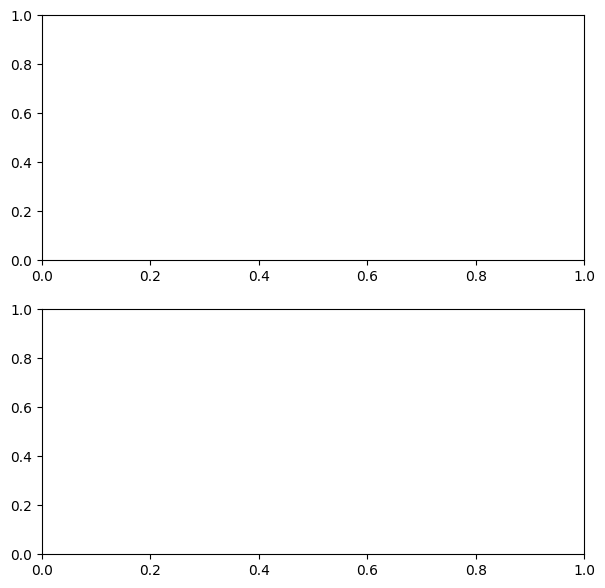

In [208]:
fig, arr = plt.subplots(
    2,
    1,
    figsize=(7,7),
    sharey=True
)

In [202]:
fig.title = "HELLO"

In [205]:
arr[0].set_title("helo")

Text(0.5, 1.0, 'helo')

In [206]:
arr[0]

<Axes: title={'center': 'helo'}>

In [198]:
arr[0]

<Axes: >

In [199]:
arr[1]

<Axes: >

tuple

In [221]:
axes

<Axes: >

In [333]:
plt.subplots?

Signature:
plt.subplots(
    nrows=1,
    ncols=1,
    *,
    sharex=False,
    sharey=False,
    squeeze=True,
    width_ratios=None,
    height_ratios=None,
    subplot_kw=None,
    gridspec_kw=None,
    **fig_kw,
)
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False or 'none': each subplot x- or y-axis will be independent.
    - 'row': each subplot row will share an x- or y-axis.
    - 'col': each subplot column will share an x- or y-axis.

    When subplots have a shared x-axis along a column, only the x tick
    labels

`fig` - Figure Object (Sometimes will need to interact)

`ax` - Axis Object (Primarily interact with this object)

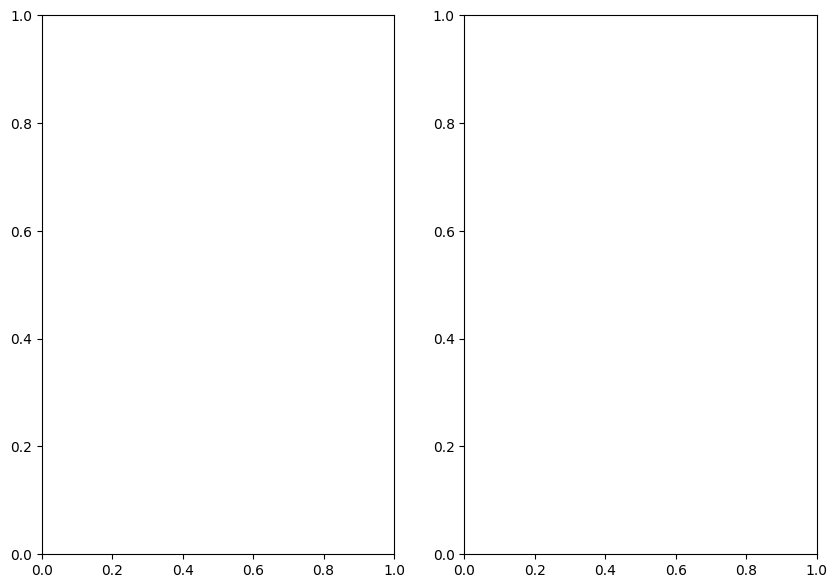

In [741]:
# Unpacking
fig, ax = plt.subplots(1,2, figsize=(10,7))

In [356]:
# Method 1
ax[0][1]

<Axes: >

In [357]:
# Method 2
ax[0,1]

<Axes: >

In [745]:
type(fig)

matplotlib.figure.Figure

In [748]:
type(ax[0])

matplotlib.axes._axes.Axes

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

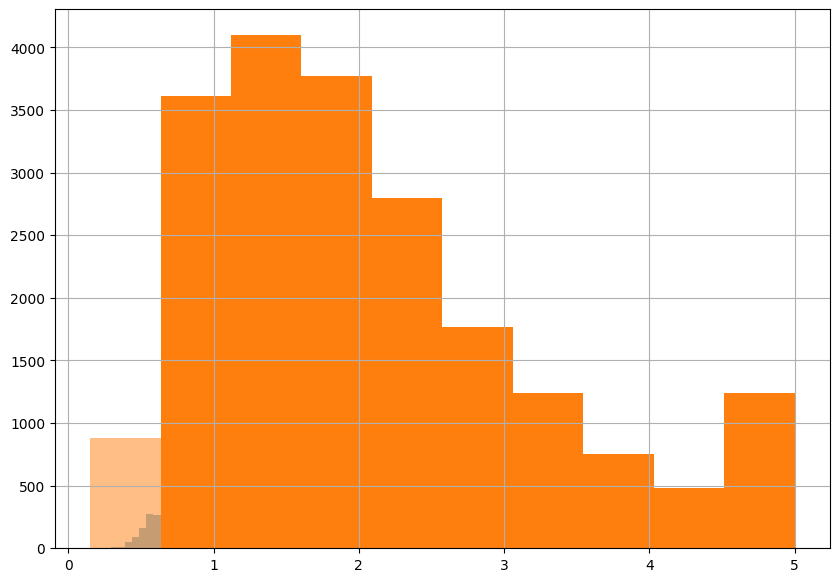

In [939]:
# Defining fig and ax
fig, ax = plt.subplots(1,1, figsize=(10,7))

data_df['MedHouseValue'].hist(
    bins=100,
    ax=ax, # Using the same ax
    label='Many Bins',
    alpha=0.5, # Opacity
)

data_df['MedHouseValue'].hist(
    bins=10,
    ax=ax, # This is key 🔑
    label='Few Bins',
    alpha=0.5,
    kde='density'
)

ax.legend() # Enabling Legend
ax.set_title('Woah this is atitle')

# ax.set_xscale('log')

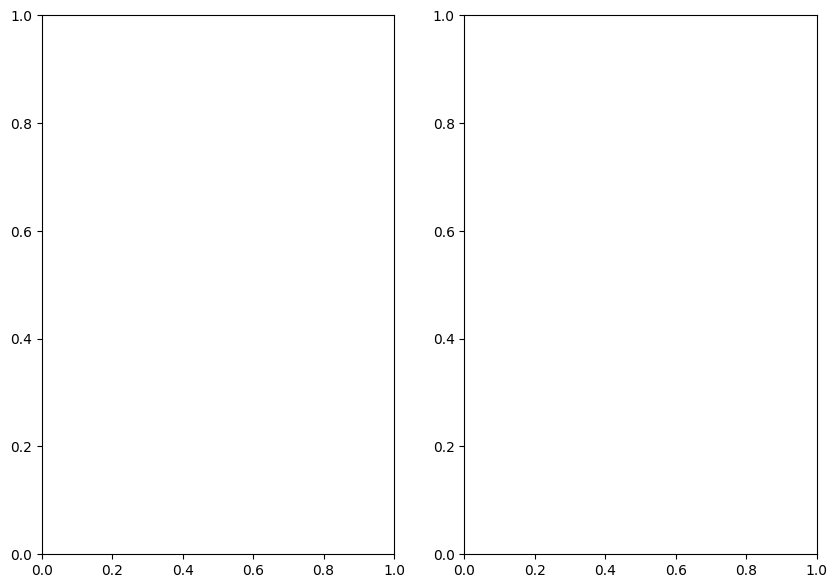

In [767]:
fig, ax = plt.subplots(1,2, figsize=(10,7))


In [768]:
ax

array([<Axes: >, <Axes: >], dtype=object)

Text(0.5, 0.98, 'woah this is a title')

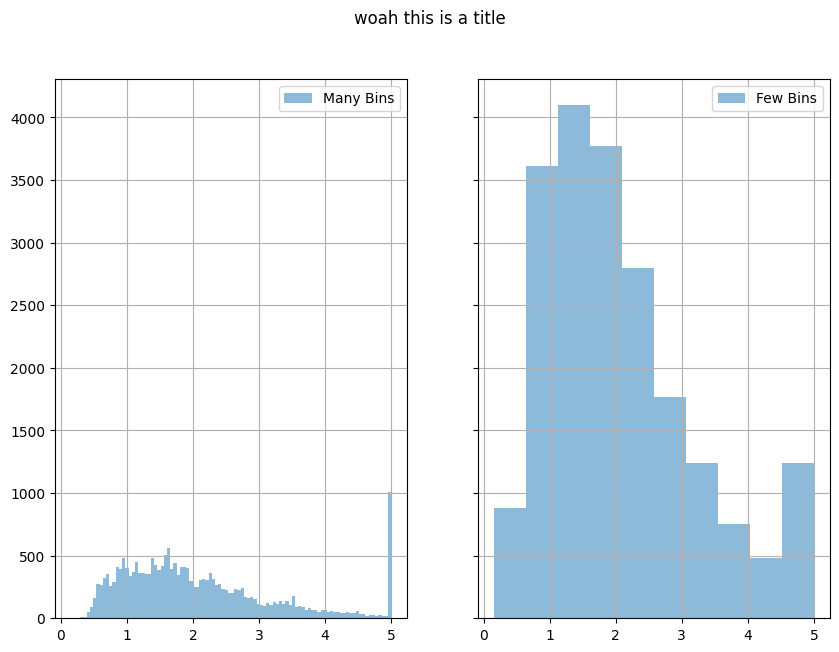

In [772]:
# Defining fig and ax
# Sharey is important!
fig, ax = plt.subplots(1,2, figsize=(10,7), sharey=True)

data_df['MedHouseValue'].hist(
    bins=100,
    ax=ax[0], # Using the same ax
    label='Many Bins',
    alpha=0.5, # Opacity
)

data_df['MedHouseValue'].hist(
    bins=10,
    ax=ax[1], # This is key 🔑
    label='Few Bins',
    alpha=0.5,
)

ax[0].legend() # Enabling Legend on the axis
ax[1].legend() # Enabling Legend on the axis

fig.suptitle('woah this is a title')


In [183]:
data_df['MedHouseValue'].value_counts()

MedHouseValue
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: count, Length: 3842, dtype: int64

/Users/bipinaasi/aidi-1100/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of MedHouseValue')

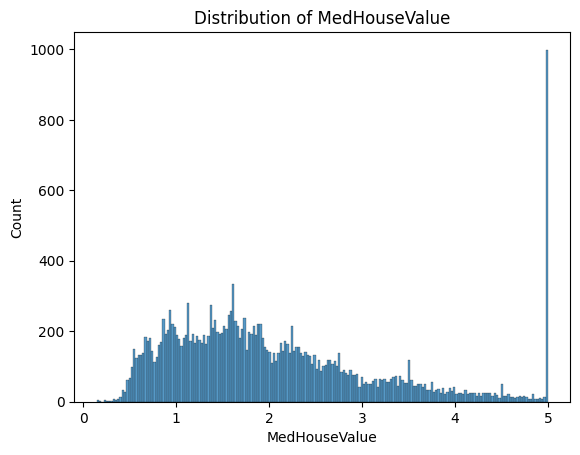

In [217]:
# Exercise 5: Plot the distribution of the target variable 'MedHouseValue' (Median house value).
ax = sns.histplot(
    data_df['MedHouseValue'],
    bins=200
)
ax.set_title('Distribution of MedHouseValue')

In [773]:
ex_df = pd.DataFrame(
    {
    'col1':[1,2,3,4,5,6],
    'col2':[6,5,4,3,2,1],
    'col3':[4.01,4,4,4,4,4],
})

In [774]:
ex_df

,col1,col2,col3
0,1,6,4.01
1,2,5,4.00
2,3,4,4.00
3,4,3,4.00
4,5,2,4.00
5,6,1,4.00


In [775]:
cols = ['col1','col2']
ex_df[cols]

,col1,col2
0,1,6
1,2,5
2,3,4
3,4,3
4,5,2
5,6,1


In [782]:
# This is just a view (does not change in place)
ex_df.iloc[:,[2,1,0]]

,col3,col2,col1
0,4.01,6,1
1,4.00,5,2
2,4.00,4,3
3,4.00,3,4
4,4.00,2,5
5,4.00,1,6


In [781]:
ex_df

,col1,col2,col3
0,1,6,4.01
1,2,5,4.00
2,3,4,4.00
3,4,3,4.00
4,5,2,4.00
5,6,1,4.00


In [423]:
ex_df.loc[:,['col1','col2']]

,col1,col2
0,1,6
1,2,5
2,3,4
3,4,3
4,5,2
5,6,1


In [284]:
ex_df.loc[0,:]

col1    1.00
col2    6.00
col3    4.01
Name: 0, dtype: float64

In [425]:
ex_df

,col1,col2,col3
0,1,6,4.01
1,2,5,4.00
2,3,4,4.00
3,4,3,4.00
4,5,2,4.00
5,6,1,4.00


<Axes: xlabel='col1', ylabel='col1'>

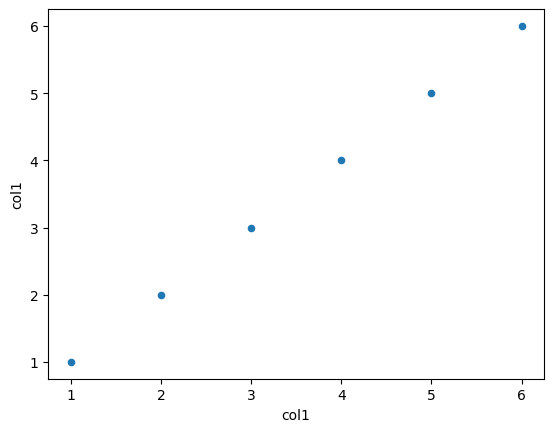

In [798]:
ex_df.plot(x='col1',y='col1', kind='scatter')

<Axes: xlabel='col2', ylabel='col2'>

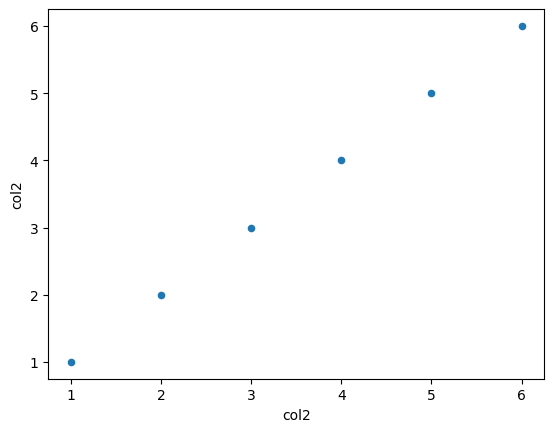

In [800]:
ex_df.plot(x='col2',y='col2', kind='scatter')

In [789]:
ex_df.corr()

,col1,col2,col3
col1,1.000000,-1.000000,-0.654654
col2,-1.000000,1.000000,0.654654
col3,-0.654654,0.654654,1.000000


### Correlation 
- is your normalized covariance (between -1 to 1)
- how strong is the linear relationship between two variable


### Covariance 
- Comparing how each feature's datapoints deviate from the mean.
- 
  (i.e if both are deviating in a positive direction, it'll be +)

### Partial Correlation

In [796]:
ex_df.corr().values.T

array([[ 1.        , -1.        , -0.65465367],
       [-1.        ,  1.        ,  0.65465367],
       [-0.65465367,  0.65465367,  1.        ]])

In [792]:
# Transpose
ex_df.corr().T

,col1,col2,col3
col1,1.000000,-1.000000,-0.654654
col2,-1.000000,1.000000,0.654654
col3,-0.654654,0.654654,1.000000


<Axes: xlabel='col2', ylabel='col2'>

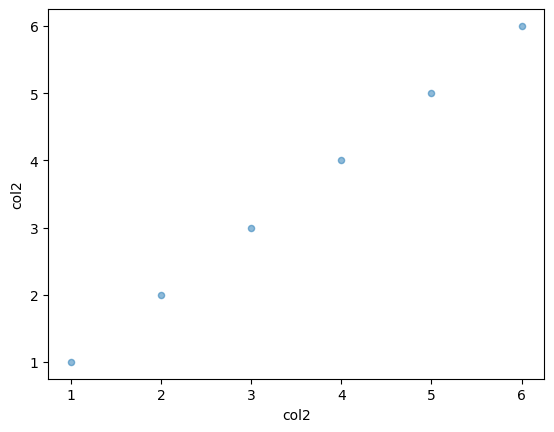

In [288]:
ex_df.plot.scatter(x="col2", y="col2", alpha=0.5)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/2880px-Anscombe%27s_quartet_3.svg.png" alt="Alt Text" width="1000">



In [447]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

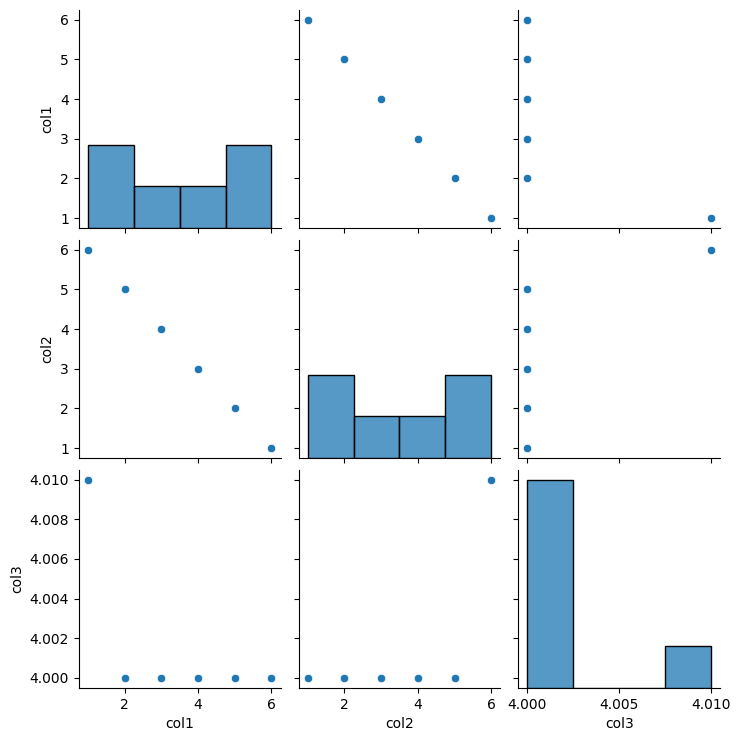

In [801]:
# Cutsey 
# Mindfull
# Demure

sns.pairplot(ex_df)

In [804]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [451]:
# Transpose
data_df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
MedInc,8.325200,8.301400,7.257400,5.643100,3.846200,4.036800,3.659100,3.120000,2.080400,3.691200,...,3.567300,3.517900,3.125000,2.549500,3.712500,1.560300,2.556800,1.700000,1.867200,2.388600
HouseAge,41.000000,21.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,42.000000,52.000000,...,11.000000,15.000000,15.000000,27.000000,28.000000,25.000000,18.000000,17.000000,18.000000,16.000000
AveRooms,6.984127,6.238137,8.288136,5.817352,6.281853,4.761658,4.931907,4.797527,4.294118,4.970588,...,5.932584,6.145833,6.023377,5.445026,6.779070,5.045455,6.114035,5.205543,5.329513,5.254717
AveBedrms,1.023810,0.971880,1.073446,1.073059,1.081081,1.103627,0.951362,1.061824,1.117647,0.990196,...,1.134831,1.141204,1.080519,1.078534,1.148256,1.133333,1.315789,1.120092,1.171920,1.162264
Population,322.000000,2401.000000,496.000000,558.000000,565.000000,413.000000,1094.000000,1157.000000,1206.000000,1551.000000,...,1257.000000,1200.000000,1047.000000,1082.000000,1041.000000,845.000000,356.000000,1007.000000,741.000000,1387.000000
AveOccup,2.555556,2.109842,2.802260,2.547945,2.181467,2.139896,2.128405,1.788253,2.026891,2.172269,...,2.824719,2.777778,2.719481,2.832461,3.026163,2.560606,3.122807,2.325635,2.123209,2.616981
Latitude,37.880000,37.860000,37.850000,37.850000,37.850000,37.850000,37.840000,37.840000,37.840000,37.840000,...,39.290000,39.330000,39.260000,39.190000,39.270000,39.480000,39.490000,39.430000,39.430000,39.370000
Longitude,-122.230000,-122.220000,-122.240000,-122.250000,-122.250000,-122.250000,-122.250000,-122.250000,-122.260000,-122.250000,...,-121.320000,-121.400000,-121.450000,-121.530000,-121.560000,-121.090000,-121.210000,-121.220000,-121.320000,-121.240000
MedHouseValue,4.526000,3.585000,3.521000,3.413000,3.422000,2.697000,2.992000,2.414000,2.267000,2.611000,...,1.120000,1.072000,1.156000,0.983000,1.168000,0.781000,0.771000,0.923000,0.847000,0.894000


In [806]:
ex_df.corr()

,col1,col2,col3
col1,1.000000,-1.000000,-0.654654
col2,-1.000000,1.000000,0.654654
col3,-0.654654,0.654654,1.000000


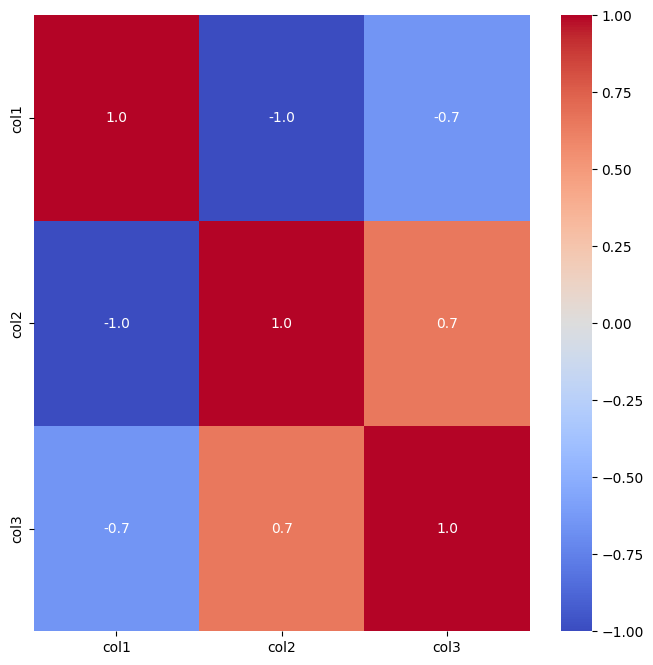

In [453]:
# Exercise 6: Create a correlation matrix heatmap for the dataset.

plt.figure(figsize=(8, 8))
sns.heatmap(ex_df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [293]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [ ]:
# Exercise 6: Create a correlation matrix heatmap for the dataset.

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [831]:
# Exercise: Get top 3 most correlated features to MedHouseValue (Magnitude)
data_df.corr()['MedHouseValue'].abs().sort_values().iloc[-3:].index

Index(['AveRooms', 'MedInc', 'MedHouseValue'], dtype='object')

In [834]:
data_df.corr()['MedHouseValue'].abs().sort_values()

AveOccup         0.023737
Population       0.024650
Longitude        0.045967
AveBedrms        0.046701
HouseAge         0.105623
Latitude         0.144160
AveRooms         0.151948
MedInc           0.688075
MedHouseValue    1.000000
Name: MedHouseValue, dtype: float64

In [470]:
# Exercise: Get top 3 most correlated features to MedHouseValue
data_df.corr()['MedHouseValue'].sort_values(ascending=False)

MedHouseValue    1.000000
MedInc           0.688075
AveRooms         0.151948
HouseAge         0.105623
AveOccup        -0.023737
Population      -0.024650
Longitude       -0.045967
AveBedrms       -0.046701
Latitude        -0.144160
Name: MedHouseValue, dtype: float64

In [471]:
data_df.corr()['MedHouseValue'].sort_values(ascending=False).index[:3]

Index(['MedHouseValue', 'MedInc', 'AveRooms'], dtype='object')

In [474]:
# Exercise: Strongest magnitude to MedHouseValue
# NOTE: ORDER IS IMPORTANT
data_df.corr()['MedHouseValue'].abs().sort_values(ascending=False).index[:3]

Index(['MedHouseValue', 'MedInc', 'AveRooms'], dtype='object')

In [467]:
# Comma is only used for 2 dimensional objects
data_df.corr().iloc[:,:3]

,MedInc,HouseAge,AveRooms
MedInc,1.000000,-0.119034,0.326895
HouseAge,-0.119034,1.000000,-0.153277
AveRooms,0.326895,-0.153277,1.000000
AveBedrms,-0.062040,-0.077747,0.847621
Population,0.004834,-0.296244,-0.072213
AveOccup,0.018766,0.013191,-0.004852
Latitude,-0.079809,0.011173,0.106389
Longitude,-0.015176,-0.108197,-0.027540
MedHouseValue,0.688075,0.105623,0.151948


In [312]:
# Exercise 7: Identify the top 3 features that have the highest positive correlation with 'MedHouseValue'.

correlations = data_df.corr()['MedHouseValue'].sort_values(ascending=False)
top_3_features = correlations.index[1:4]
print("Top 3 features positively correlated with MedHouseValue:", top_3_features.tolist())

Top 3 features positively correlated with MedHouseValue: ['MedInc', 'AveRooms', 'HouseAge']


In [317]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [475]:
# Very mindfull
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [318]:
# Very mindfull
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
import seaborn as sns
import pandas as pd


In [15]:
titanic_df = sns.load_dataset('titanic')


In [841]:
m = [ True for i in range(titanic_df.shape[0])]

In [843]:
titanic_df[m]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [844]:
m[1] = False

In [846]:
m

[True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True

In [845]:
titanic_df[m]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [847]:
a = titanic_df['embark_town'] != 'Southampton' 

In [849]:
titanic_df[a]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [495]:
b = titanic_df['class'] == 'First'

In [499]:
# Why won't this work?
a and b

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [506]:
# AND Operator
b & a

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Length: 891, dtype: bool

In [507]:
# OR Operator
b | a

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

In [509]:
# Use BRACKETS 
m = ( (titanic_df['embark_town'] != 'Southampton') & (titanic_df['class'] == 'First') )

In [835]:
titanic_df[m]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [511]:
# Use BRACKETS 
m1 = titanic_df['embark_town'] != 'Southampton'
m2 = titanic_df['class'] == 'First'

In [515]:
m1 | m2

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

In [517]:
# Creates a new index
titanic_df[m1 | m2].reset_index(drop=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
3,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
4,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
370,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
371,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
372,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [519]:
# Get unique values of column
titanic_df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [836]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [520]:
titanic_df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: >

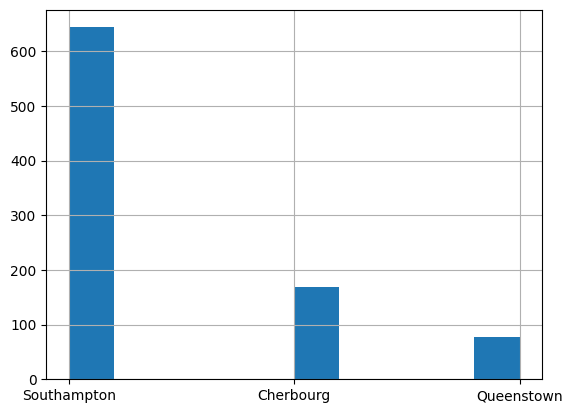

In [521]:
titanic_df['embark_town'].hist()

In [837]:
pd.get_dummies(titanic_df['embark_town'])

,Cherbourg,Queenstown,Southampton
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [525]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

pd.Series(le.fit_transform(titanic_df['embark_town']))

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int64

In [838]:
titanic_df['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

## Does calculating error on the data make sense?

Error between Cherbourg	 and Queenstown when it's LabelEncoded makes ZERO sense

In [526]:
# One Hot Encoding
pd.get_dummies(titanic_df['embark_town'])

,Cherbourg,Queenstown,Southampton
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [530]:
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch']
titanic_df['family_size']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family_size, Length: 891, dtype: int64

In [ ]:
titanic_df

In [536]:
# Drop the columns Method 1
titanic_df.drop('age',axis=1)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [535]:
# Drop the columns, Method 2 (I prefer this, requires less thinking for the reader)
titanic_df.drop(columns = 'age')

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [542]:
# Rename columns
# NOTE: DOES NOT CHANGE IN PLACE
titanic_df.rename(columns={'who':'whom'})

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,whom,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [545]:
# Change the data type 
titanic_df['who']

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: object

In [550]:
titanic_df['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [551]:
# How to deal with N/A ? 
titanic_df['age'].isnull().sum()

177

In [579]:
# Drop all rows where age is NA  
# NOTE: `~`
m = titanic_df['age'].isna()
titanic_df[~m]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,5
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [562]:
# Drop all rows where age is NA 
# Method 2
titanic_df_new = titanic_df.dropna(subset='age')

In [563]:
titanic_df_new['age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
885    39
886    27
887    19
889    26
890    32
Name: age, Length: 714, dtype: int64

Exercise 1: Identify columns with missing values and calculate the percentage of missing values for each.

Before doing it programmatically do it manually.

- Step 1: Get missing values (isna or isnull)
- Step 2: Aggregate total per columns (sum)
- Step 3: Normalize by the total rows

In [595]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [607]:
# Count of na per column / total rows per column
titanic_df.isna().sum() / 891

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
family_size    0.000000
dtype: float64

In [608]:
# Method 1:
titanic_df.isna().sum() / titanic_df.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
family_size    0.000000
dtype: float64

In [609]:
titanic_df.isna().sum().value_counts('normalize')

0      0.7500
2      0.1250
177    0.0625
688    0.0625
Name: proportion, dtype: float64

In [940]:
# Exercise 1: Identify columns with missing values and calculate the percentage of missing values for each.
t_df = titanic_df.isna().sum() / titanic_df.shape[0]
t_df.round(4)

survived       0.0000
pclass         0.0000
sex            0.0000
age            0.1987
sibsp          0.0000
parch          0.0000
fare           0.0000
embarked       0.0022
class          0.0000
who            0.0000
adult_male     0.0000
deck           0.7722
embark_town    0.0022
alive          0.0000
alone          0.0000
dtype: float64

In [941]:
# Exercise 2: Fill missing 'age' values with the median age grouped by 'sex' and 'pclass'.
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [634]:
titanic_df = sns.load_dataset('titanic')


In [637]:
# Exercise 3: Replace missing values in 'embarked' with the mode of the column.
titanic_df['embarked'].value_counts(dropna=False)

embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [638]:
titanic_df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [623]:
pd.DataFrame.fillna?

Signature:
pd.DataFrame.fillna(
    self,
    value: 'Hashable | Mapping | Series | DataFrame | None' = None,
    *,
    method: 'FillnaOptions | None' = None,
    axis: 'Axis | None' = None,
    inplace: 'bool_t' = False,
    limit: 'int | None' = None,
    downcast: 'dict | None | lib.NoDefault' = <no_default>,
) -> 'Self | None'
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series:

    * ffill: propagate last valid observation forward to next valid.
    * backfill / bfill: use next valid observation to fill gap.

    .. d

In [642]:
embarked_mode = titanic_df['embarked'].mode()
embarked_mode

0    S
Name: embarked, dtype: object

In [644]:
embarked_mode.iloc[0]

'S'

In [646]:
# Important that the type is str
titanic_df['embarked'] = titanic_df['embarked'].fillna(embarked_mode.iloc[0])

In [647]:
titanic_df['embarked'].value_counts(dropna=False)

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1024px-Boxplot_vs_PDF.svg.png" alt="Alt Text" width="500">





In [651]:
pd.DataFrame.hist?

Signature:
pd.DataFrame.hist(
    data: 'DataFrame',
    column: 'IndexLabel | None' = None,
    by=None,
    grid: 'bool' = True,
    xlabelsize: 'int | None' = None,
    xrot: 'float | None' = None,
    ylabelsize: 'int | None' = None,
    yrot: 'float | None' = None,
    ax=None,
    sharex: 'bool' = False,
    sharey: 'bool' = False,
    figsize: 'tuple[int, int] | None' = None,
    layout: 'tuple[int, int] | None' = None,
    bins: 'int | Sequence[int]' = 10,
    backend: 'str | None' = None,
    legend: 'bool' = False,
    **kwargs,
)
Docstring:
Make a histogram of the DataFrame's columns.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : str or sequence, optional
    If passed, will be used to limit 

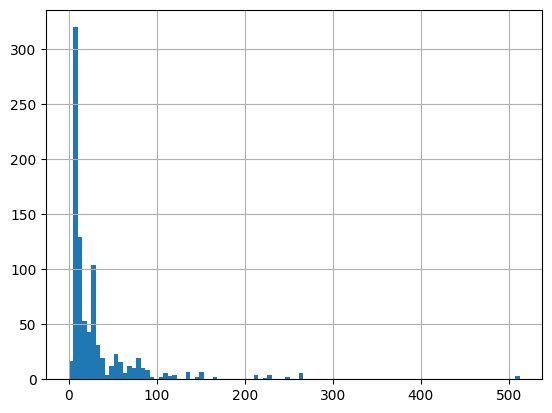

In [661]:
ax = titanic_df['fare'].hist(bins=100)

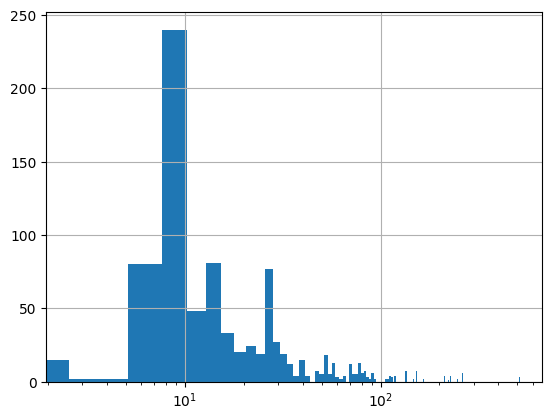

In [665]:
# Using log as your xscale (use log or symlog if you have negative values)
ax = titanic_df['fare'].hist(bins=200)
ax.set_xscale('log')

In [666]:
# Exercise 4: Detect and remove outliers in the 'fare' column using the Interquartile Range (IQR) method.

titanic_df_inliers = titanic_df.copy()

Q1 = titanic_df_inliers['fare'].quantile(0.25)
Q3 = titanic_df_inliers['fare'].quantile(0.75)
IQR = Q3 - Q1

cond1 = titanic_df_inliers['fare'] < (Q1 - 1.5 * IQR)
cond2 = titanic_df_inliers['fare'] > (Q3 + 1.5 * IQR)
m = ~( cond1 | cond2 )

titanic_df_inliers = titanic_df_inliers[m]

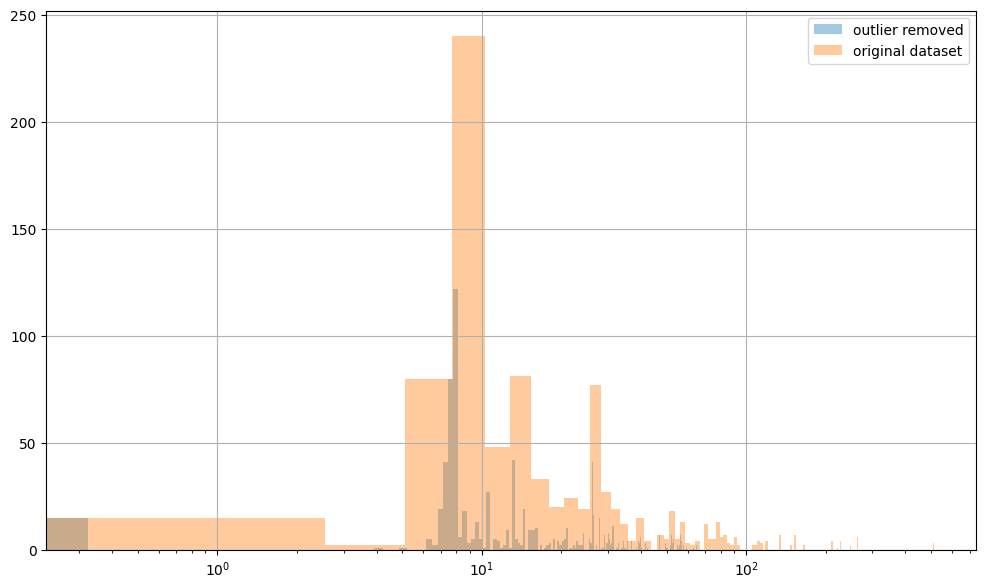

In [675]:
fig, ax = plt.subplots(1,1, figsize=(12,7))


ax = titanic_df_inliers['fare'].hist(
    bins=200,
    ax=ax,
    alpha=0.4,
    label='outlier removed'
)

ax = titanic_df['fare'].hist(
    bins=200,
    ax=ax,
    alpha=0.4,
    label='original dataset'
)
ax.set_xscale('log')

ax.legend()

Text(0.5, 0.98, 'Outlier Removed Comparison')

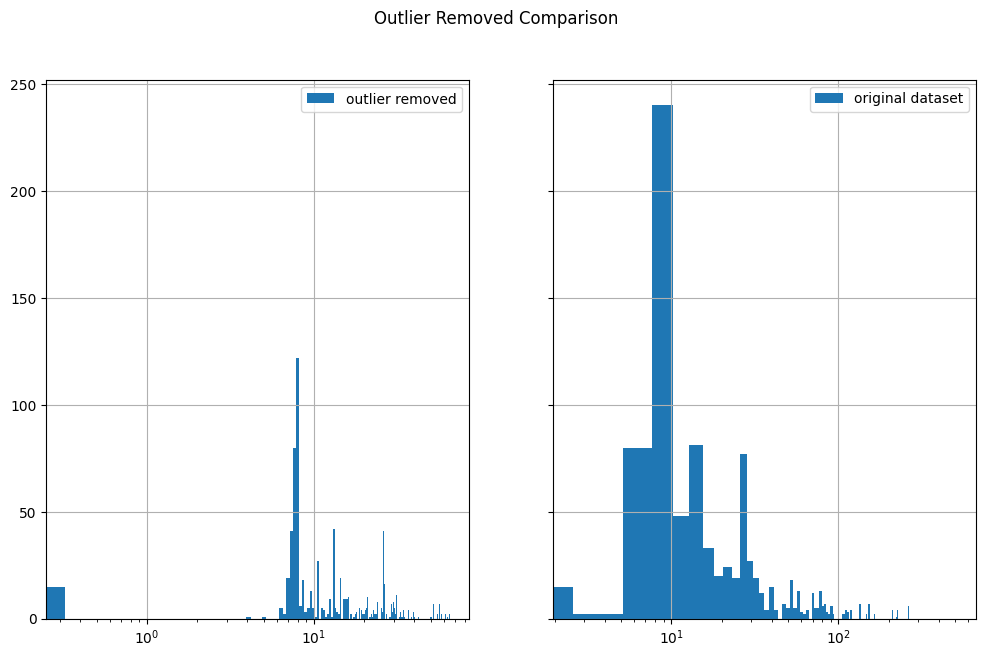

In [679]:
fig, ax = plt.subplots(1,2, figsize=(12,7), sharey=True)


titanic_df_inliers['fare'].hist(
    bins=200,
    ax=ax[0],
    label='outlier removed'
)

titanic_df['fare'].hist(
    bins=200,
    ax=ax[1],
    label='original dataset'
)
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].legend()
ax[1].legend()

fig.suptitle('Outlier Removed Comparison')

In [ ]:
# Exercise 7: Remove duplicate rows in the dataset.

In [ ]:
# Exercise 8: Verify that there are no remaining missing values in the dataset.

# Data Reshaping


In [159]:
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'SubCategory': ['X', 'X', 'Y', 'Y', 'X', 'Y'],
    'Value': [10, 15, 10, 20, 15, 25]
}

df = pd.DataFrame(data)


In [160]:
df

,Category,SubCategory,Value
0,A,X,10
1,B,X,15
2,A,Y,10
3,B,Y,20
4,A,X,15
5,B,Y,25


In [161]:
grouped = df.groupby(['Category', 'SubCategory'])
grouped

In [162]:
# Iterate over the GroupBy object
for group, data in grouped:
    print(f"Group: {group}")
    print(data)
    print("-" * 40)

# filters for the unique combinations of the values ['Category', 'SubCategory']

Group: ('A', 'X')
  Category SubCategory  Value
0        A           X     10
4        A           X     15
----------------------------------------
Group: ('A', 'Y')
  Category SubCategory  Value
2        A           Y     10
----------------------------------------
Group: ('B', 'X')
  Category SubCategory  Value
1        B           X     15
----------------------------------------
Group: ('B', 'Y')
  Category SubCategory  Value
3        B           Y     20
5        B           Y     25
----------------------------------------


In [164]:
# Iterate over the GroupBy object
for group, data in grouped:
    print(f"Group: {group}")
    print(data.sum())
    print("-" * 40)

# filters for the unique combinations of the values ['Category', 'SubCategory']

Group: ('A', 'X')
Category       AA
SubCategory    XX
Value          25
dtype: object
----------------------------------------
Group: ('A', 'Y')
Category        A
SubCategory     Y
Value          10
dtype: object
----------------------------------------
Group: ('B', 'X')
Category        B
SubCategory     X
Value          15
dtype: object
----------------------------------------
Group: ('B', 'Y')
Category       BB
SubCategory    YY
Value          45
dtype: object
----------------------------------------


In [165]:
df

,Category,SubCategory,Value
0,A,X,10
1,B,X,15
2,A,Y,10
3,B,Y,20
4,A,X,15
5,B,Y,25


In [188]:
grouped = df.groupby(['Category', 'SubCategory']).agg(
    sum_value = ('Value','sum')
)
grouped

sum_value
Category SubCategory           
A        X                   25
         Y                   10
B        X                   15
         Y                   45

In [172]:
grouped = df.groupby(['Category', 'SubCategory']).agg(
    {'Value':['sum','max']}
)
grouped

Value    
                       sum max
Category SubCategory          
A        X              25  15
         Y              10  10
B        X              15  15
         Y              45  25

In [173]:
# Assume we have stock data for two companies
dates = pd.date_range('2020-01-01', periods=100)
stock_a = pd.DataFrame({'Price': np.random.rand(100).cumsum()}, index=dates)
stock_b = pd.DataFrame({'Price': np.random.rand(80).cumsum()}, index=dates[:80])

In [186]:
# One corect way
stock_a.resample(rule='ME').agg(
    {'Price':'sum'}
)

,Price
2020-01-31,259.746817
2020-02-29,707.581139
2020-03-31,1223.805277
2020-04-30,457.775566


In [187]:
# One which I like
stock_a.resample(rule='ME').agg(
    monthly_sum_price = ('Price', 'sum')
)

,monthly_sum_price
2020-01-31,259.746817
2020-02-29,707.581139
2020-03-31,1223.805277
2020-04-30,457.775566


In [185]:
# Deduct marks in your assignment
stock_a.resample(rule='ME').sum()
# What is this behaviour

,Price
2020-01-31,259.746817
2020-02-29,707.581139
2020-03-31,1223.805277
2020-04-30,457.775566


In [194]:
grouped = df.groupby(['Category', 'SubCategory']).agg(
    {'Value':'sum'}
)
grouped

Value
Category SubCategory       
A        X               25
         Y               10
B        X               15
         Y               45

In [195]:
# When you use pivot_table with only index. It is the SAME as a groupby
df.pivot_table(
    values='Value',
    index=['Category', 'SubCategory'], # What is being grouped
    aggfunc='sum'
)

Value
Category SubCategory       
A        X               25
         Y               10
B        X               15
         Y               45

In [196]:
# When you use pivot_table with index and columns, you are going beyond a groupby
# Returns a grouped matrix
df.pivot_table(
    values='Value', 
    index='Category', # What is being grouped 
    columns='SubCategory', # What is being grouped
    aggfunc='sum', 
    fill_value=0
)

SubCategory,X,Y
Category,,
A,25,10
B,15,45


**Why is reshaping important**
- Data Schema constraints set by plotting functions 
- Reporting
- Pivot tables and group by operations help you create aggregate values which are useful features (Preliminary Feature Engineering)

In [197]:
df.pivot_table(
    values='Value',
    index='Category',
    columns='SubCategory',
    aggfunc=['sum', 'mean'],
    fill_value=0
)

sum      mean      
SubCategory   X   Y     X     Y
Category                       
A            25  10  12.5  10.0
B            15  45  15.0  22.5

In [199]:
df.groupby(['Category','SubCategory']).agg(
    {'Value': ['sum', 'mean']}
)

Value      
                       sum  mean
Category SubCategory            
A        X              25  12.5
         Y              10  10.0
B        X              15  15.0
         Y              45  22.5

In [53]:
# melt turns columns into rows, creating two new columns: one for the variable name and one for the value.

In [200]:
pivot = df.pivot_table(values='Value', index='Category', columns='SubCategory', aggfunc='sum', fill_value=0)
pivot

SubCategory,X,Y
Category,,
A,25,10
B,15,45


In [201]:
pivot.reset_index()

SubCategory,Category,X,Y
0,A,25,10
1,B,15,45


In [202]:
pivot.reset_index().melt(
    id_vars='Category', 
    value_vars=['X', 'Y'], 
    var_name='SubCategory', 
    value_name='Value'
)


,Category,SubCategory,Value
0,A,X,25
1,B,X,15
2,A,Y,10
3,B,Y,45


**`Melt` is the reversal of `groupby` and `pivot` operations**

- stack 
- unstack

In [16]:
# 7. Reindexing and Alignment

# Using the Stock Prices dataset:

import pandas as pd
import numpy as np

# Assume we have stock data for two companies
dates = pd.date_range('2020-01-01', periods=100)
stock_a = pd.DataFrame({'Price': np.random.rand(100).cumsum()}, index=dates)
stock_b = pd.DataFrame({'Price': np.random.rand(80).cumsum()}, index=dates[:80])

In [18]:
stock_a

,Price
2020-01-01,0.625938
2020-01-02,1.562494
2020-01-03,1.780170
2020-01-04,2.574675
2020-01-05,3.490265
...,...
2020-04-05,49.051341
2020-04-06,49.147554
2020-04-07,49.381750
2020-04-08,50.023815


In [19]:
stock_a.index[0]

Timestamp('2020-01-01 00:00:00')

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

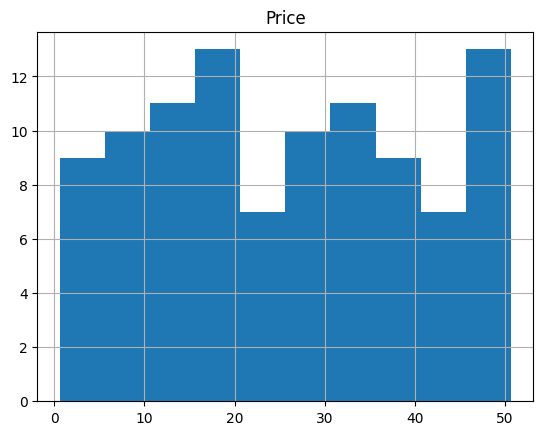

In [20]:
stock_a.hist()

<Axes: >

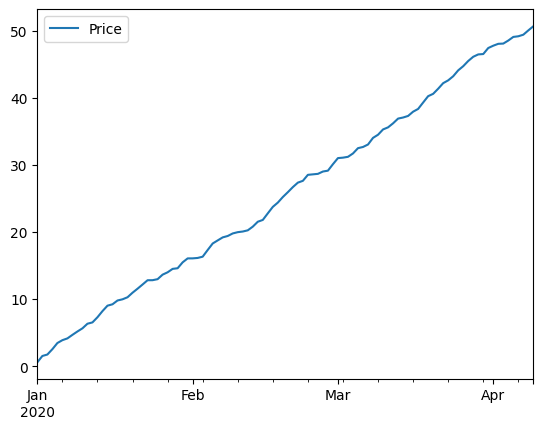

In [23]:
stock_a.plot()

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

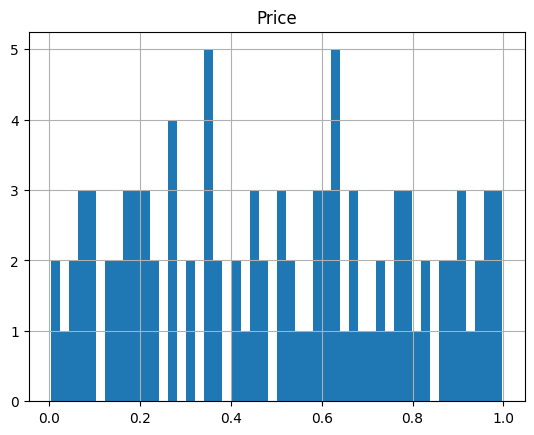

In [28]:
stock_a.diff().hist(bins=50)

**Training model on entire data set? Bad or good?**
- Only after you've validated: 
    1. Data Drift between production and dataset is minimal/0
    2. Model is well generalizable in the dataset your trained/tested on 

<Axes: >

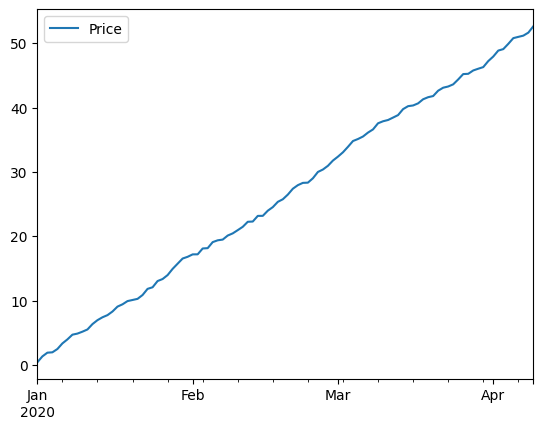

In [1017]:
stock_a.plot()

In [442]:
stock_b

,Price
2020-01-01,0.377211
2020-01-02,1.083452
2020-01-03,1.671671
2020-01-04,2.255950
2020-01-05,3.241385
...,...
2020-03-16,34.376859
2020-03-17,34.438524
2020-03-18,35.095999
2020-03-19,35.180074


In [443]:
import statsmodels.api as sm


In [30]:
stock_a.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
      

In [31]:
# Fill in missing days
stock_b.reindex(stock_a.index)

,Price
2020-01-01,0.290393
2020-01-02,1.198279
2020-01-03,1.915434
2020-01-04,2.722775
2020-01-05,2.907316
...,...
2020-04-05,NaN
2020-04-06,NaN
2020-04-07,NaN
2020-04-08,NaN


In [37]:
# Take a monthly sum of stock_b
# I will remove marks from your assignment
stock_b.resample('ME').sum()

,Price
2020-01-31,287.198176
2020-02-29,746.369116
2020-03-31,747.372118


In [38]:
# Take a monthly sum of stock_b
stock_b.resample('ME').agg(
    monthly_sum = ('Price', 'sum')
)

,monthly_sum
2020-01-31,287.198176
2020-02-29,746.369116
2020-03-31,747.372118


In [41]:
# Take a monthly sum of stock_b
stock_b.resample('ME').agg(
    {'Price':'sum'}
)

,Price
2020-01-31,287.198176
2020-02-29,746.369116
2020-03-31,747.372118


## Querying

In [ ]:
! pip install -q jupysql duckdb-engine duckdb

In [59]:
import pandas as pd
import duckdb


In [60]:
# Sample DataFrame 1: Customers
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com']
})

# Sample DataFrame 2: Orders
orders = pd.DataFrame({
    'order_id': [101, 102, 103, 104],
    'customer_id': [1, 2, 2, 5],
    'product': ['Book', 'Pen', 'Notebook', 'Pencil'],
    'quantity': [2, 5, 3, 4]
})



In [62]:
orders

,order_id,customer_id,product,quantity
0,101,1,Book,2
1,102,2,Pen,5
2,103,2,Notebook,3
3,104,5,Pencil,4


In [61]:
customers

,customer_id,name,email
0,1,Alice,alice@example.com
1,2,Bob,bob@example.com
2,3,Charlie,charlie@example.com
3,4,David,david@example.com


In [63]:
conn = duckdb.connect(database=':memory:')


In [64]:
# Register DataFrames as DuckDB tables
conn.register('customers', customers)
conn.register('orders', orders)


## SQL - Structured Querying Language

### Why 
- Hardware and underlying code optimizes for Read, Write and More operations

In [71]:
query = """
SELECT * 
FROM ORDERS
"""

result = conn.execute(query).fetchdf()
print(result)

   order_id  customer_id   product  quantity
0       101            1      Book         2
1       102            2       Pen         5
2       103            2  Notebook         3
3       104            5    Pencil         4


In [73]:

query = """
SELECT SUM(quantity) as total_quantity
FROM ORDERS
"""

result = conn.execute(query).fetchdf()
print(result)

   total_quantity
0            14.0


In [74]:
conn.register('titanic_df', titanic_df)

In [80]:
query = """
SELECT DISTINCT age
FROM titanic_df
"""

result = conn.execute(query).fetchdf()
print(result)

      age
0   14.00
1   40.00
2   28.50
3   47.00
4   55.50
..    ...
84  23.00
85  32.50
86  12.00
87  24.50
88   0.67

[89 rows x 1 columns]


In [84]:
query = """
SELECT age
    , avg(fare) as average_fare
FROM titanic_df
GROUP BY age
ORDER BY age
"""

result = conn.execute(query).fetchdf()
print(result)

      age  average_fare
0    0.42      8.516700
1    0.67     14.500000
2    0.75     19.258300
3    0.83     23.875000
4    0.92    151.550000
..    ...           ...
84  70.50      7.750000
85  71.00     42.079200
86  74.00      7.775000
87  80.00     30.000000
88    NaN     22.158567

[89 rows x 2 columns]


In [94]:
# Common Table Expressions  (CTEs)
# Sub Queries 

# Query the most a person has paid in the dataset
query = """
-- This is a CTE
WITH temp_table as (
    SELECT max(fare) as max_fare
    FROM titanic_df
)
select *
from titanic_df
where fare in (select max_fare from temp_table)
"""

result = conn.execute(query).fetchdf()
print(result)

   survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
0         1       1  female  35.0      0      0  512.3292        C  First   
1         1       1    male  36.0      0      1  512.3292        C  First   
2         1       1    male  35.0      0      0  512.3292        C  First   

     who  adult_male deck embark_town alive  alone  
0  woman       False  NaN   Cherbourg   yes   True  
1    man        True    B   Cherbourg   yes  False  
2    man        True    B   Cherbourg   yes   True  


In [97]:
# Common Table Expressions  (CTEs)
# Join 

# Query the most a person has paid in the dataset
query = """
-- This is a CTE
WITH temp_table as (
    SELECT max(fare) as max_fare
    FROM titanic_df
)
select *
from titanic_df as d 
join temp_table as t on 
    t.max_fare = d.fare
"""

result = conn.execute(query).fetchdf()
print(result)

   survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
0         1       1  female  35.0      0      0  512.3292        C  First   
1         1       1    male  36.0      0      1  512.3292        C  First   
2         1       1    male  35.0      0      0  512.3292        C  First   

     who  adult_male deck embark_town alive  alone  max_fare  
0  woman       False  NaN   Cherbourg   yes   True  512.3292  
1    man        True    B   Cherbourg   yes  False  512.3292  
2    man        True    B   Cherbourg   yes   True  512.3292  


In [ ]:
# Context manager
with open()

In [98]:
# Manually close
conn.close()

In [11]:
# Example: Count of orders per customer
query = """
SELECT
    c.name,
    COUNT(o.order_id) AS total_orders,
    SUM(o.quantity) AS total_quantity
FROM
    customers c
LEFT JOIN
    orders o
ON
    c.customer_id = o.customer_id
GROUP BY
    c.name
ORDER BY
    total_orders DESC
"""

result = conn.execute(query).fetchdf()
print(result)


      name  total_orders  total_quantity
0      Bob             2             8.0
1    Alice             1             2.0
2  Charlie             0             NaN
3    David             0             NaN


In [12]:
conn.close()


In [13]:
sql  = '''
select
    sex
    , mean(fare)
    , mean(age)
From titanic_df 
group by sex
'''

duckdb.query_df(df=titanic_df,virtual_table_name = 'titanic_df', sql_query = sql)

NameError: name 'titanic_df' is not defined

In [967]:
# If you do this in the assignment you will LOSE marks
titanic_df.groupby(['sex'])['fare'].mean()


sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [965]:
titanic_df.groupby(['sex']).agg(
    avg_fare = ('fare',np.mean), 
    avg_age = ('age',np.mean), 
)

,avg_fare,avg_age
sex,,
female,44.479818,27.915709
male,25.523893,30.726645


In [966]:
tdf = titanic_df.groupby(['sex']).agg(
    {
        'fare' : [np.mean,'size'],
        'age' : [np.mean,'size'],
    }    
)
tdf

fare             age     
             mean size       mean size
sex                                   
female  44.479818  314  27.915709  314
male    25.523893  577  30.726645  577

In [99]:
# Convert USD to CAD
ex_rate = {
    'USD' : {'CAD':1.39},
    'GPB': {'CAD': 1.81}
}

In [100]:
ex_rate

{'USD': {'CAD': 1.39}, 'GPB': {'CAD': 1.81}}

In [103]:
import random
curr = [
    random.choice(['USD', 'GPB']) 
    for i in range(titanic_df.shape[0])
]

In [105]:
titanic_df['curr'] = curr

In [124]:
fare_cads = []
for index, row in titanic_df.iterrows():
    fare = row.fare
    curr = row.curr
    cad_rate = ex_rate.get(curr).get('CAD')
    fare_cad = fare * cad_rate
    fare_cads.append(fare_cad)

In [125]:
titanic_df['fare_cad'] = fare_cads

In [143]:
def return_cad_fare(row):
    '''
    Row must be passed
    '''
    fare = row.fare
    curr = row.curr
    cad_rate = ex_rate.get(curr).get('CAD')
    fare_cad = fare * cad_rate
    return fare_cad

```python
def does_nothing(x):
    return x + 1
```
these two are equal

```python
lambda x : x + 1
```

A `lambda` is a one line function

`apply` iterates through all rows in the df


In [138]:
# setting axis = 1 passes all columns in the row as it iterates through all rows
titanic_df.apply(does_nothing,axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,curr,fare_cad
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,GPB,13.122500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,GPB,129.022773
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,USD,11.015750
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,GPB,96.111000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,GPB,14.570500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,GPB,23.530000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,USD,41.700000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,GPB,42.444500
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,GPB,54.300000


In [151]:
titanic_df['survived'].apply(lambda x: x+1)

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    1
889    2
890    1
Name: survived, Length: 891, dtype: int64

In [146]:
titanic_df['sex'].apply(lambda x : x)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [148]:
def does_nothing(x):
    return x 

In [149]:
titanic_df['sex'].apply(does_nothing)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [152]:
titanic_df.apply(return_cad_fare, axis=1)

0       13.122500
1      129.022773
2       11.015750
3       96.111000
4       14.570500
          ...    
886     23.530000
887     41.700000
888     42.444500
889     54.300000
890     14.027500
Length: 891, dtype: float64

In [153]:
ex_rate

{'USD': {'CAD': 1.39}, 'GPB': {'CAD': 1.81}}

In [ ]:
    fare = row.fare
    curr = row.curr
    cad_rate = ex_rate.get(curr).get('CAD')
    fare_cad = fare * cad_rate


In [157]:
# Not selecting a column and setting axis =1 because I need access to all columns per row
# `apply` is what gives you access
titanic_df['fare_cad']= titanic_df.apply(
    lambda row : row.fare * ex_rate.get(row.curr).get('CAD') , 
    axis=1
)

In [158]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,curr,fare_cad
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,GPB,13.122500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,GPB,129.022773
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,USD,11.015750
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,GPB,96.111000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,GPB,14.570500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,GPB,23.530000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,USD,41.700000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,GPB,42.444500
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,GPB,54.300000


```python
def does_nothing(x):
    return x + 1
```
these two are equal

```python
lambda x : x + 1
```

A `lambda` is a one line function